<a href="https://colab.research.google.com/github/karolinakuligowska/TMSMM_codes/blob/main/Class_12_Neural_Nets_RNN__R_example_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# 1. Load dataset ----
df = pd.read_csv('movie_review.csv', encoding='utf-8')
print(df.head())

# 2. Explore the data ----
print(df['tag'].value_counts())
print(df['text'][0])

# Split the dataset into training and testing
training, testing = train_test_split(df, test_size=0.2, random_state=123)

# Analyze word distribution in reviews
word_counts = df['text'].apply(lambda x: len(x.split()))
print(word_counts.describe())

   fold_id cv_tag  html_id  sent_id  \
0        0  cv000    29590        0   
1        0  cv000    29590        1   
2        0  cv000    29590        2   
3        0  cv000    29590        3   
4        0  cv000    29590        4   

                                                text  tag  
0  films adapted from comic books have had plenty...  pos  
1  for starters , it was created by alan moore ( ...  pos  
2  to say moore and campbell thoroughly researche...  pos  
3  the book ( or " graphic novel , " if you will ...  pos  
4  in other words , don't dismiss this film becau...  pos  
tag
pos    32937
neg    31783
Name: count, dtype: int64
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .
count    64720.000000
mean        23.063674
std         13.453944
min          1.00

In [4]:
# 3. Prepare the data ----
num_words = 10000
max_length = 50

# Create the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=num_words,
    output_sequence_length=max_length
)

# Adapt the TextVectorization layer to the training data
text_vectorization.adapt(training['text'])

# View vocabulary
vocabulary = text_vectorization.get_vocabulary()
print(vocabulary[:10])

# See how the text vectorization layer transforms inputs
sample_text = training['text'].iloc[0]
print(f"Original: {sample_text}")
print(f"Transformed: {text_vectorization(tf.constant([sample_text])).numpy()}")

['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 'that']
Original: i wouldn't be surprised if a couple of guys got together and created the opening credits , and then someone saw it and made up a story to go along with it .
Transformed: [[  19  705   23 1218   52    3  306    5  482  295  261    4  880    2
   443  690    4  103  351  510   10    4  136   48    3   67    6  129
   266   12   10    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]


In [5]:
# 4. Build the model ----
input_layer = Input(shape=(1,), dtype="string")
x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=16)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)

# 5. Loss function and optimizer ----
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. Train the model ----
history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
81/81 - 3s - 39ms/step - accuracy: 0.5299 - loss: 0.6917 - val_accuracy: 0.5463 - val_loss: 0.6895
Epoch 2/20
81/81 - 2s - 26ms/step - accuracy: 0.5530 - loss: 0.6870 - val_accuracy: 0.5775 - val_loss: 0.6826
Epoch 3/20
81/81 - 1s - 13ms/step - accuracy: 0.5859 - loss: 0.6776 - val_accuracy: 0.6164 - val_loss: 0.6706
Epoch 4/20
81/81 - 1s - 13ms/step - accuracy: 0.6263 - loss: 0.6600 - val_accuracy: 0.6334 - val_loss: 0.6529
Epoch 5/20
81/81 - 1s - 15ms/step - accuracy: 0.6591 - loss: 0.6347 - val_accuracy: 0.6608 - val_loss: 0.6313
Epoch 6/20
81/81 - 2s - 21ms/step - accuracy: 0.6856 - loss: 0.6061 - val_accuracy: 0.6718 - val_loss: 0.6140
Epoch 7/20
81/81 - 2s - 23ms/step - accuracy: 0.7004 - loss: 0.5848 - val_accuracy: 0.6683 - val_loss: 0.6079
Epoch 8/20
81/81 - 2s - 20ms/step - accuracy: 0.7186 - loss: 0.5638 - val_accuracy: 0.6558 - val_loss: 0.6121
Epoch 9/20
81/81 - 1s - 15ms/step - accuracy: 0.7229 - loss: 0.5541 - val_accuracy: 0.6786 - val_loss: 0.5997
Epoch 10/2

In [6]:
# 7. Evaluate the model ----
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)
print(f"Test Accuracy: {results[1]:.2f}")



Test Accuracy: 0.68


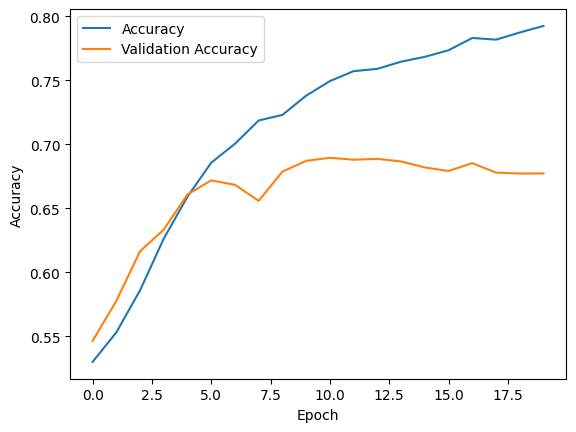

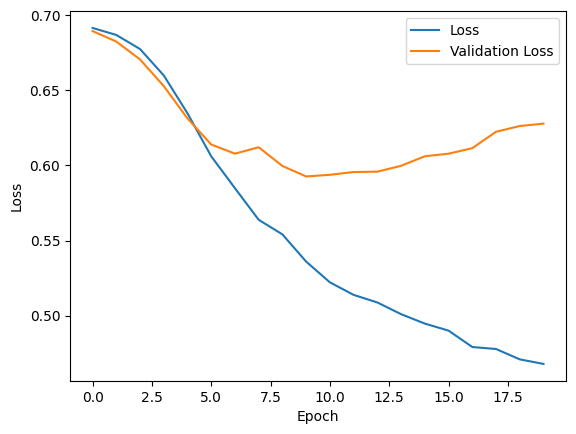

In [7]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()